## HW1: Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [1]:
import numpy as np
import sympy as sym
import pandas as pd
import matplotlib.pyplot as plt
import random

## Load data

In [2]:
train_df = pd.read_csv("train_data.csv")
x_train, y_train = train_df['x_train'], train_df['y_train']

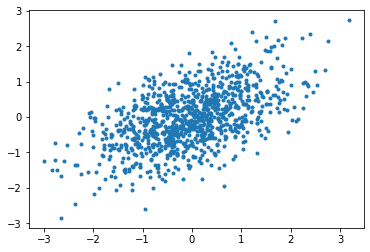

In [3]:
plt.plot(x_train, y_train, '.')

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [4]:
def MSE_gradient(x_train, y_train):
    # Initialize the coefficients w0, w1 and learning rate
    w0, w1 = random.uniform(-5, 5), random.uniform(-5, 5)
    learning_rate = 0.005
    epoch = 2000
    cost = []

    for i in range(epoch):
        # Get the output prediction for the epoch

        diff_w0, diff_w1, loss = 0, 0, 0
        for j in range(len(x_train)):
            y_pred = w0 + w1 * x_train[j]
            # Calculate the total loss for the training data
            loss += (y_train[j] - y_pred)**2

            # Partial derivative MSE with regard to w0 and w1 respectively
            diff_w0 += -2 * (y_train[j] - w0 + w1 * x_train[j])
            diff_w1 += -2 * x_train[j] * (y_train[j] - (w0 + w1 * x_train[j]))

        # Calculate the MSE by dividing the number of training data to loss
        cost.append(loss / len(x_train))

        # Update w0 and w1
        w0 = w0 - learning_rate * (diff_w0 / len(x_train))
        w1 = w1 - learning_rate * (diff_w1 / len(x_train))
    return cost, w0, w1

In [5]:
def MAE_gradient(x_train, y_train):
    # Initialize the coefficients w0, w1 and learning rate
    w0, w1 = random.uniform(-5, 5), random.uniform(-5, 5)
    learning_rate = 0.005
    epoch = 2000
    cost = []

    for i in range(epoch):
        # Get the output prediction for the epoch

        diff_w0, diff_w1, loss = 0, 0, 0
        for j in range(len(x_train)):
            y_pred = w0 + w1 * x_train[j]
            # Calculate the total loss for the training data
            loss += abs(y_train[j] - y_pred)

            # Partial derivative MAE with regard to w0 and w1 respectively
            if y_pred > y_train[j]:
                diff_w0 += 1
                diff_w1 += x_train[j]
            else:
                diff_w0 -= 1
                diff_w1 -= x_train[j]

        # Calculate the MAE by dividing the number of training data to loss
        cost.append(loss / len(x_train))

        # Update w0 and w1
        w0 = w0 - learning_rate * (diff_w0 / len(x_train))
        w1 = w1 - learning_rate * (diff_w1 / len(x_train))
    return cost, w0, w1

# Start training the model

In [6]:
cost, w0, w1 = MSE_gradient(x_train, y_train)
print(w0, w1)

-0.04117466353771587 0.4508902869339218


In [7]:
# Get the prediction by caculating the linear regression
def model(w0, w1, data):
    return w0 + w1 * data
y_preds = model(w0, w1, x_train)

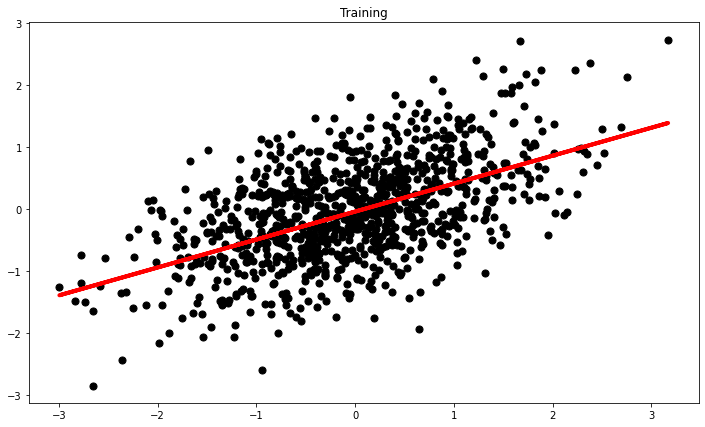

In [8]:
# Visualize the data by giving ground truth of x, y and prediction of y
def fig(ground_x, ground_y, pred_y, title):
    plt.figure(figsize=(12, 7))
    plt.title(title)
    plt.scatter(ground_x, ground_y, s=50, color='black', label='Y')
    plt.plot(ground_x, pred_y, color='red', linewidth=4)
    plt.show()

fig(x_train, y_train, y_preds, 'Training')

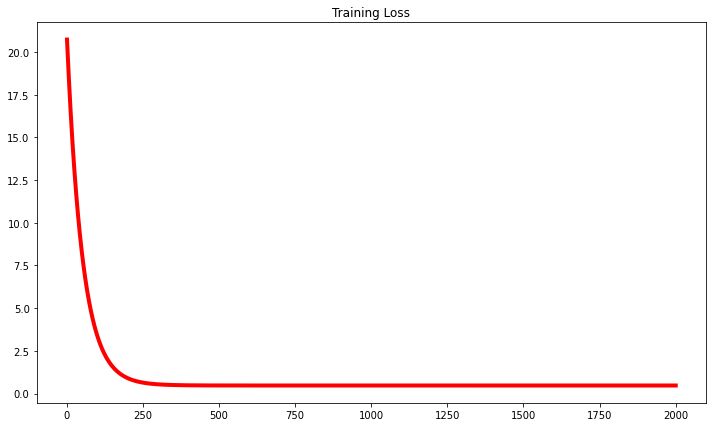

In [9]:
def loss_fig(l, title):
    plt.figure(figsize=(12, 7))
    plt.title(title)
    plt.plot(np.arange(1, len(l) + 1), l, linewidth=4, color='red')
    plt.show()

loss_fig(cost, 'Training Loss')

## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the MSE of (y_test, y_pred)

In [10]:
test_data = pd.read_csv("test_data.csv")
x_test, y_test = test_data['x_test'], test_data['y_test']

In [11]:
# Get the prediction of test data
y_pred = model(w0, w1, x_test)

MSE: 0.4933820379029851, MAE: 0.5626502342851808


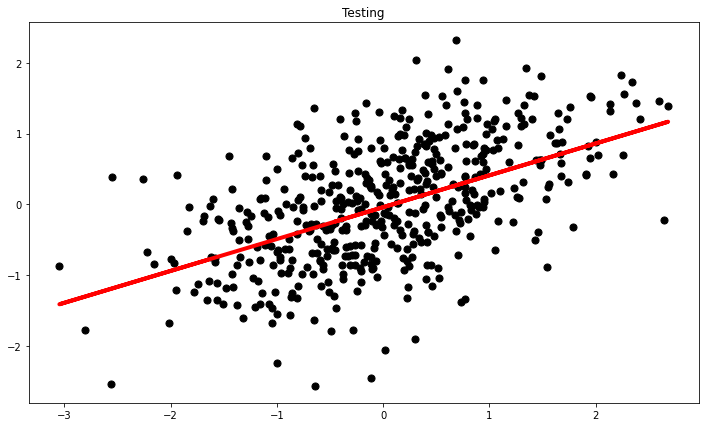

In [12]:
# Calculate MSE
mse = 0
mae = 0
for t, p in zip(y_test, y_pred):
    mae += abs(t - p)
    mse += (t - p)**2
mse /= len(y_test)
mae /= len(y_test)
print(f'MSE: {mse}, MAE: {mae}')

fig(x_test, y_test, y_pred, 'Testing')